In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
Amazon_Sales = pd.read_csv("Amazon Sale Report.csv")

C:\Users\Sorena\AppData\Local\Temp\ipykernel_12068\493988936.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  Amazon_Sales = pd.read_csv("Amazon Sale Report.csv")


In [4]:
Amazon_Sales.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [5]:
Amazon_Sales.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

### **Drop Duplicates**

In [6]:
Amazon_Sales[Amazon_Sales.duplicated(["Order ID","ASIN"])]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,B08YYQS8FH,Shipped,1,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
98955,407-4853873-4978725,06-22-22,Shipped,Amazon,Expedited,J0230,J0230-SKD-M,Set,M,B08XNJG8B1,Shipped,1,1163.0,Zirakpur,Punjab,140603.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [7]:
Amazon_Sales.drop_duplicates(["Order ID","ASIN"],inplace=True,ignore_index=True)


### **fill null values**

In [8]:
Amazon_Sales.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49150
B2B                       0
dtype: int64

In [9]:
Amazon_Sales["promotion-ids"].fillna("no promotion",inplace=True)

In [10]:
Amazon_Sales["Courier Status"].fillna("Unknown",inplace=True)

In [11]:
Amazon_Sales["Amount"].fillna(0,inplace=True)

In [12]:
Amazon_Sales["ship-city"].fillna("Unknown",inplace=True)
Amazon_Sales["ship-state"].fillna("Unknown",inplace=True)
Amazon_Sales["ship-postal-code"].fillna("Unknown",inplace=True)

In [13]:
pd.to_datetime(Amazon_Sales["Date"])

0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128963   2022-05-31
128964   2022-05-31
128965   2022-05-31
128966   2022-05-31
128967   2022-05-31
Name: Date, Length: 128968, dtype: datetime64[ns]

### **Visualization**

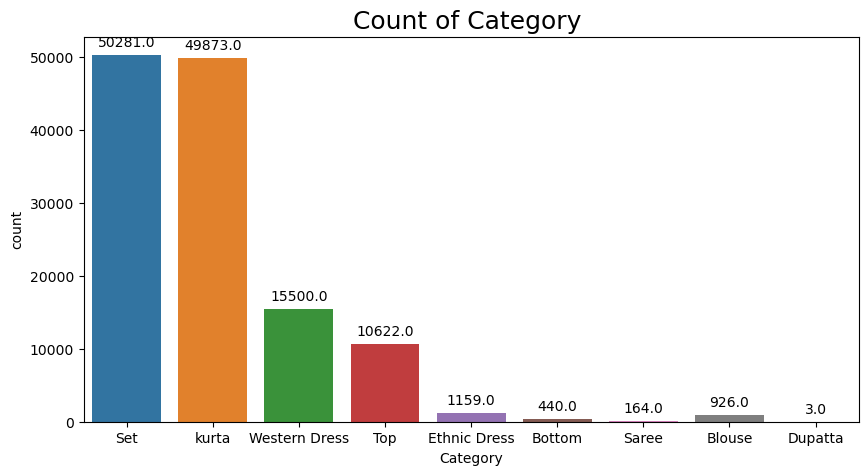

In [14]:
# Count of Category 
plt.figure(figsize = (10,5))
plt.title("Count of Category ",color="black",size=18)
ax = sns.countplot(data = Amazon_Sales, x = 'Category',palette="tab10" )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 4), textcoords='offset points')
plt.show()

C:\Users\Sorena\AppData\Local\Temp\ipykernel_12068\3969024741.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amount_by_status = Amazon_Sales.groupby("Status").sum()["Amount"]


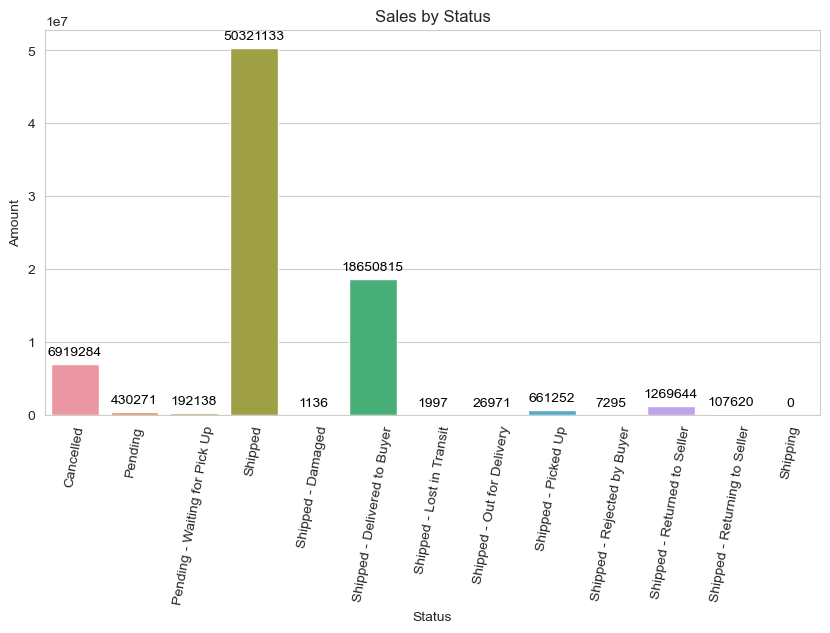

In [15]:
#Sales by Status
amount_by_status = Amazon_Sales.groupby("Status").sum()["Amount"]
sns.set_style("whitegrid")
sns.set_palette("Greens_d")
fig , ax = plt.subplots(figsize=(10,5))
bar_plot = sns.barplot(x=amount_by_status.index, y=amount_by_status.values, ax=ax)
ax.set_xlabel("Status")
ax.set_ylabel("Amount")
ax.set_title("Sales by Status")
plt.xticks(rotation=80)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 4), textcoords='offset points')
plt.show()


<Axes: title={'center': 'Number of products sold by category'}, xlabel='Category', ylabel='count'>

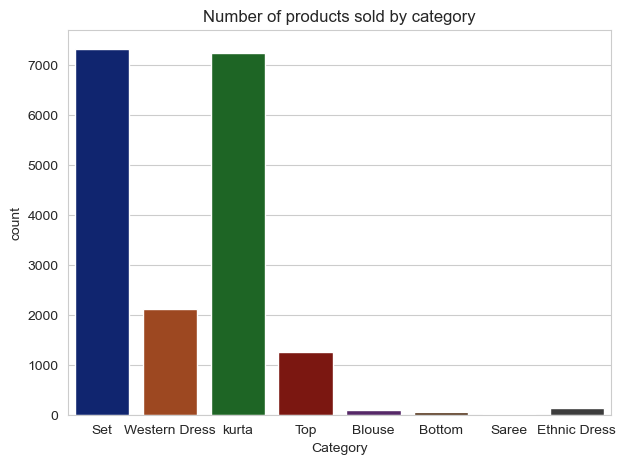

In [28]:
# Number of products sold by category
plt.figure(figsize=(7,5))
cancelled = Amazon_Sales[Amazon_Sales["Status"] == "Cancelled"]
plt.title('Number of products sold by category')
sns.countplot(data = cancelled , x = "Category" , palette="dark")

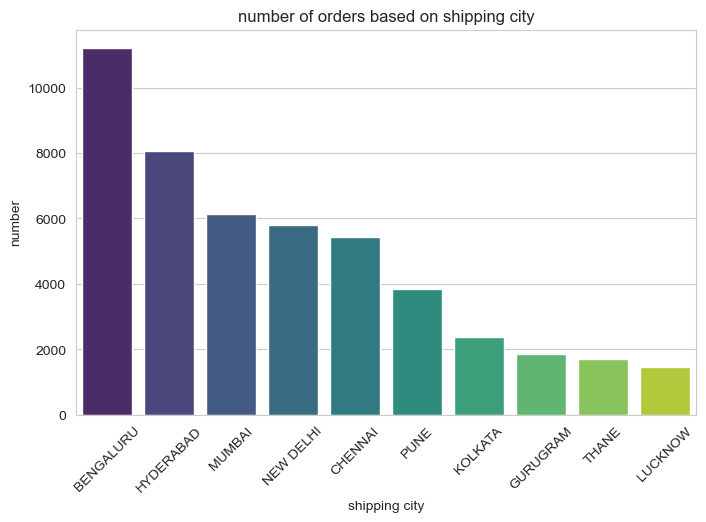

In [25]:
# number of orders based on shipping city
plt.figure(figsize=(8,5))
sns.countplot(data=Amazon_Sales, x='ship-city', palette='viridis', order=Amazon_Sales['ship-city'].value_counts().nlargest(10).index)
plt.title('number of orders based on shipping city')
plt.xlabel('shipping city')
plt.ylabel('number')
plt.xticks(rotation=45)
plt.show()


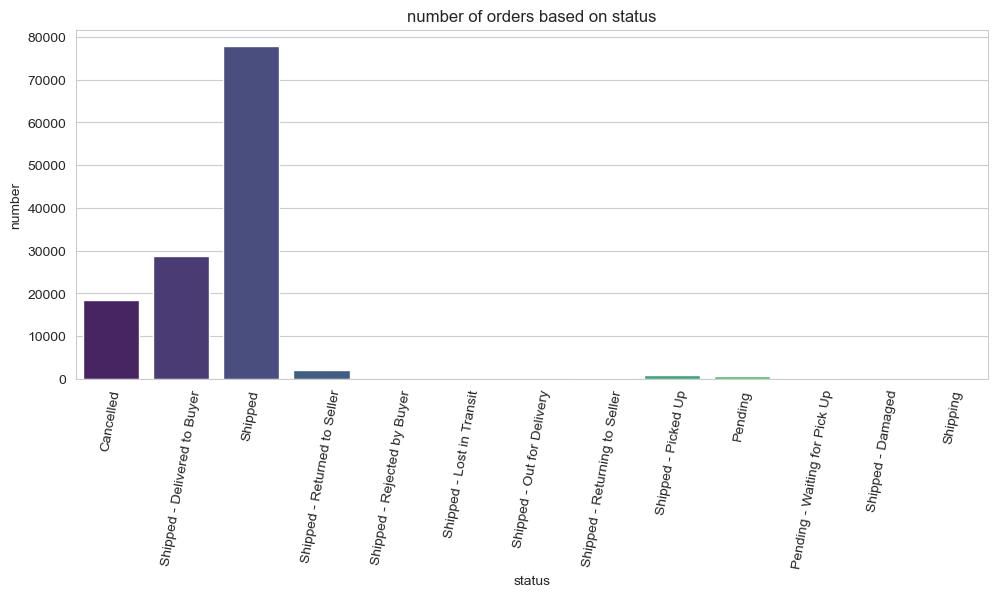

In [18]:
# number of orders based on status
plt.figure(figsize=(12,8))
sns.countplot(data=Amazon_Sales, x='Status', palette='viridis')
plt.title('number of orders based on status')
plt.xlabel('status')
plt.ylabel('number')
plt.xticks(rotation=80)
plt.tight_layout(pad=8,h_pad=7,w_pad=4)
plt.show()


In [19]:
Amazon_Sales.head(2)

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False


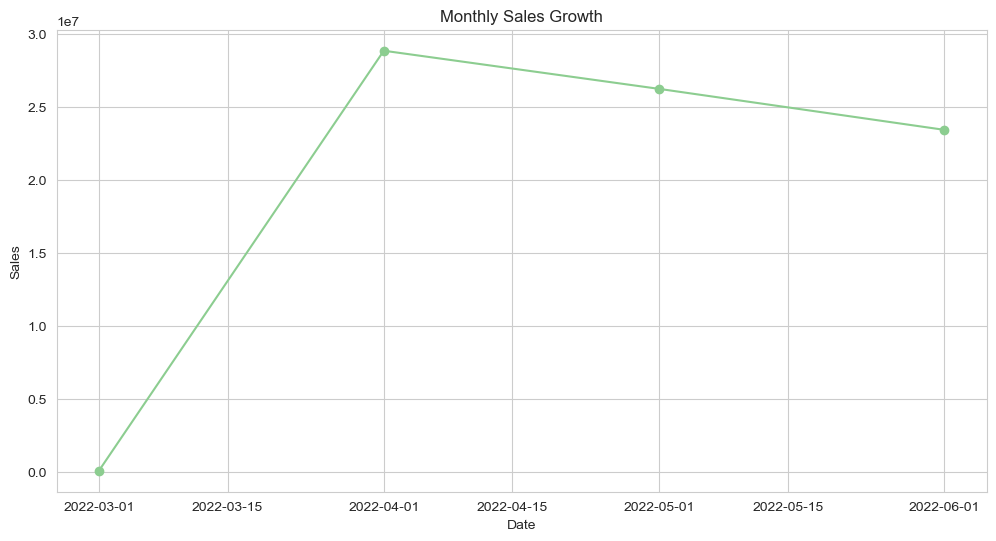

In [20]:
# Monthly Sales Growth
Amazon_Sales['Date'] = pd.to_datetime(Amazon_Sales['Date'])
monthly_sales = Amazon_Sales.groupby(Amazon_Sales['Date'].dt.strftime('%Y-%m'))['Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Date'])
monthly_sales.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Amount'], marker='o', linestyle='-')
plt.title('Monthly Sales Growth')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Five cities with the highest number of canceled orders')

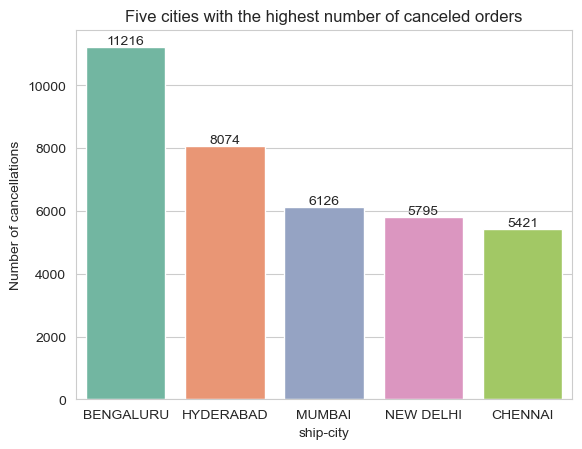

In [21]:
# Number of cancellations
colors = ['blue','red','green','pink','yellow']
data = Amazon_Sales["ship-city"].value_counts().head(5).reset_index()
ax = sns.barplot(data=data, x='index', y='ship-city', palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("ship-city")
plt.ylabel("Number of cancellations")
plt.title("Five cities with the highest number of canceled orders")

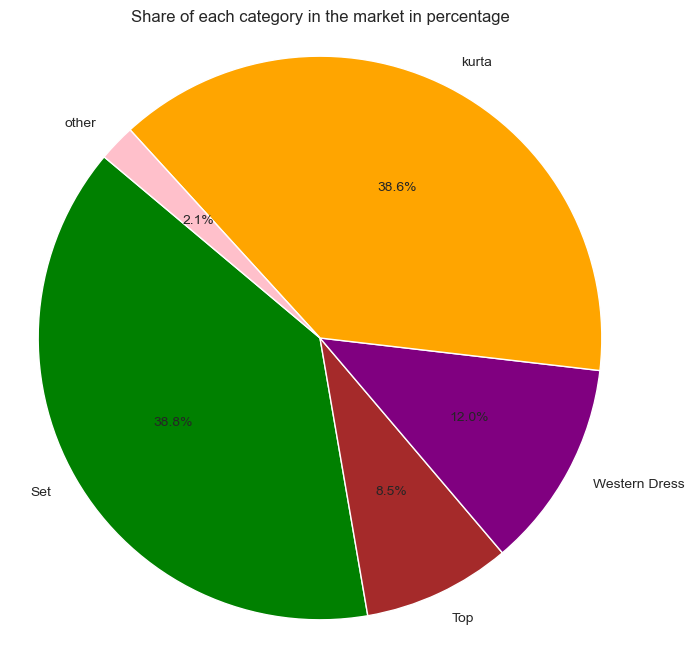

In [22]:
# Share of each category in the market in percentage
category_sales = Amazon_Sales.groupby('Category')['Qty'].sum()
min_percentage = 2  

total_sales = category_sales.sum()
category_percentages = (category_sales / total_sales) * 100

filtered_categories = category_percentages[category_percentages >= min_percentage]

other_percentage = category_percentages[category_percentages < min_percentage].sum()
filtered_categories['other'] = other_percentage

plt.figure(figsize=(8, 8))
plt.pie(filtered_categories, labels=filtered_categories.index, autopct='%1.1f%%', startangle=140, colors=['green','brown','purple','orange','pink'])
plt.title('Share of each category in the market in percentage')
plt.axis('equal')
plt.show()


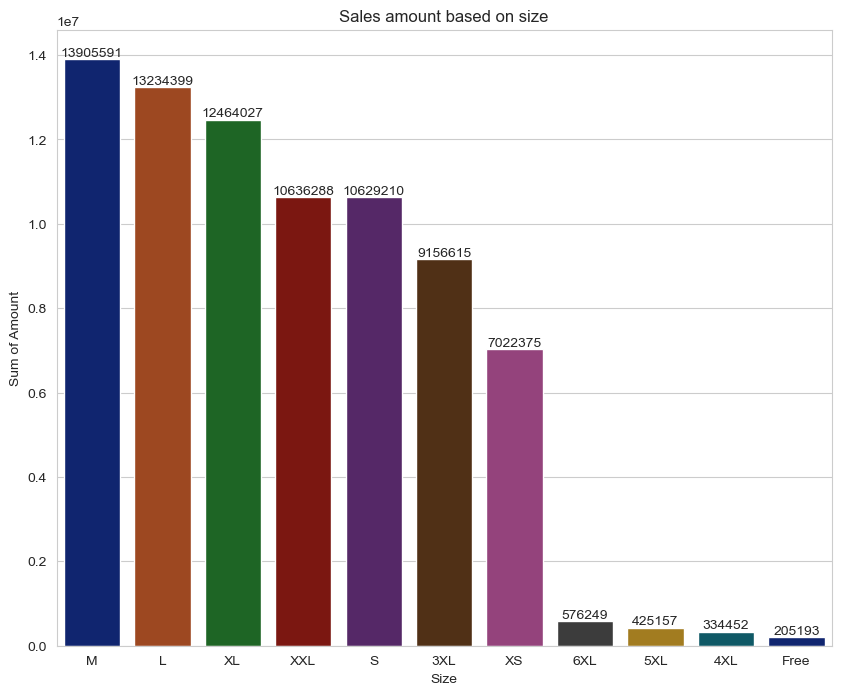

In [23]:
# Sales amount based on size
plt.figure(figsize=(10,8))
Size_Sales = Amazon_Sales.groupby('Size')['Amount'].sum().sort_values(ascending=False)
ax = sns.barplot( x=Size_Sales.index, y=Size_Sales.values,palette='dark')
plt.ylabel('Sum of Amount')
plt.title("Sales amount based on size")
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.0f')

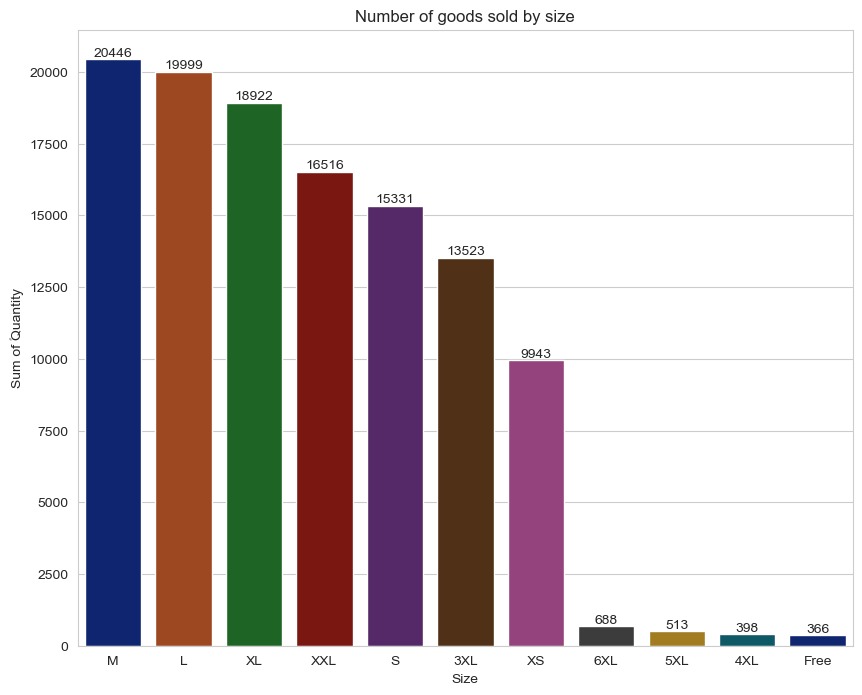

In [24]:
# Number of goods sold by size
plt.figure(figsize=(10,8))
Size_Sales = Amazon_Sales.groupby('Size')['Qty'].sum().sort_values(ascending=False)
ax = sns.barplot( x=Size_Sales.index, y=Size_Sales.values,palette='dark')
plt.ylabel('Sum of ًQuantity')
plt.title("Number of goods sold by size")
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.0f')